<a href="https://colab.research.google.com/github/thekaszsz/ML_book/blob/main/ML_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    random_state = 0,
    n_features = 2,
    centers = 2,
    cluster_std = 1,
    n_samples = 300
)

In [4]:
import pandas as pd

df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,target
0,3.359415,5.248267,0
1,2.931100,0.782556,1
2,1.120314,5.758061,0
3,2.876853,0.902956,1
4,1.666088,5.605634,0


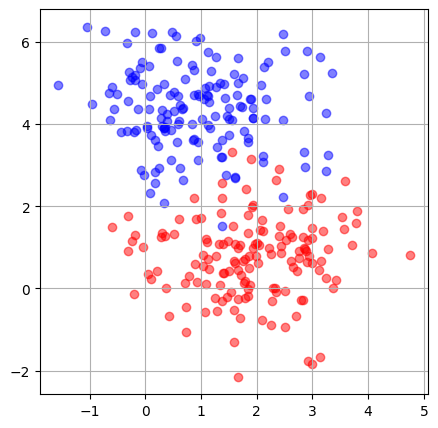

In [5]:
import matplotlib.pyplot as plt

df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]

plt.figure(figsize = (5,5))
plt.scatter(df0[0], df0[1], color = 'b', alpha = 0.5)
plt.scatter(df1[0], df1[1], color = 'r', alpha = 0.5)
plt.grid()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

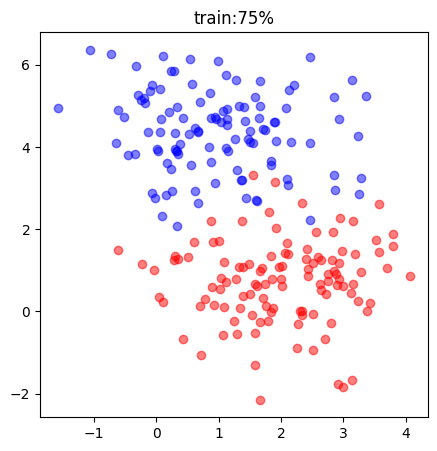

In [7]:
df = pd.DataFrame(X_train)
df['target'] = y_train

df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
plt.figure(figsize =(5,5))
plt.scatter(df0[0], df0[1], color = 'b', alpha = 0.5)
plt.scatter(df1[0], df1[1], color = 'r', alpha = 0.5)
plt.title('train:75%')
plt.show()

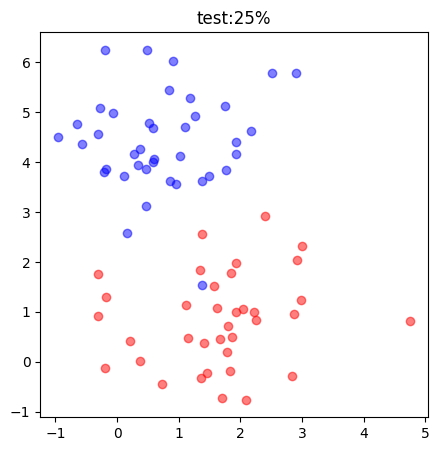

In [11]:
df = pd.DataFrame(X_test)
df['target'] = y_test

df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
plt.figure(figsize =(5,5))
plt.scatter(df0[0], df0[1], color = 'b', alpha = 0.5)
plt.scatter(df1[0], df1[1], color = 'r', alpha = 0.5)
plt.title('test:25%')
plt.show()

In [12]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)

SVC()

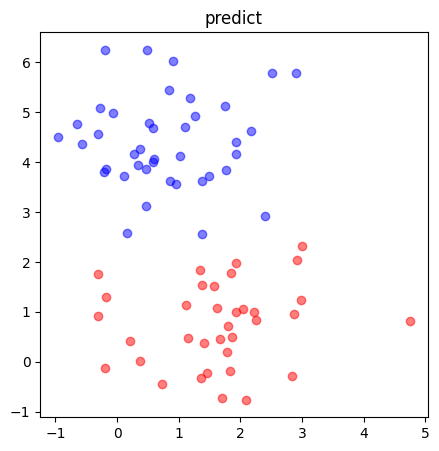

In [13]:
pred = model.predict(X_test)
df = pd.DataFrame(X_test)
df['target'] = pred

df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]

plt.figure(figsize = (5,5))
plt.scatter(df0[0], df0[1], color = 'b', alpha = 0.5)
plt.scatter(df1[0], df1[1], color = 'r', alpha = 0.5)
plt.title('predict')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('정답률:', score*100,'%')

정답률: 96.0 %
